In [2]:
from utils.data import load_data
from stimuli.motion_structure import MotionStructure
from analysis.kalman_filter import apply_filters_on_trial
from analysis.model import fit
import numpy as np
import pandas as pd
import pickle
structures={
    'IND': MotionStructure(0, 2),
    'GLO': MotionStructure(1, 1/4),
    'CLU': MotionStructure(0, 1/4),
    'SDH': MotionStructure(0.77, 1/4)
}
s = ['IND', 'GLO', 'CLU_012', 'CLU_120', 'CLU_201', 'SDH_012', 'SDH_120', 'SDH_201']
df_sichao = pd.read_csv(f'../data/pilot_sichao_glo=0.77_v=1.5_0.csv')[['ground_truth', 'Sichao_choice']]
df_johannes = pd.read_csv(f'../data/pilot_johannes_glo=0.77_v=1.5_0.csv')[['ground_truth', 'Johannes_choice']]
data_sichao = load_data('../data/sichao_0729.dat')
data_johannes = load_data('../data/johannes_0729.dat')
x, t = [], []
for trial in data_sichao:
    x.append(trial['φ'][3:])
    t.append(trial['t'][3:])
x_sichao, t_sichao = np.array(x), np.array(t)
x, t = [], []
for trial in data_johannes:
    x.append(trial['φ'][3:])
    t.append(trial['t'][3:])
x_johannes, t_johannes = np.array(x), np.array(t)
rng = np.random.RandomState()
dx = rng.normal(size=x_sichao.shape)

In [3]:
def add_noise(x, σ_R=0.):
    return rng.normal(loc=x, scale=σ_R, size=x.shape)

In [3]:
def loss(x, t, σ_x, σ_R, df_target, repeats=1):
    x = add_noise(np.repeat(x, repeats, axis=0), σ_x)
    t = np.repeat(t, repeats, axis=0)
    df_target = np.repeat(df_target, repeats, axis=0)
    ℓ = []
    for ii in range(x.shape[0]):
        ℓ.append(np.array(apply_filters_on_trial(x[ii], t[ii], σ_R, structures=structures)))
    df = pd.DataFrame(ℓ, columns=s)
    df['target'] = df_target
    mask = np.column_stack([df['target'] == structure for structure in ['IND', 'GLO'] + ['CLU'] * 3 + ['SDH'] * 3])
    res = fit(df, mask, 'target', np.array([0.01, 0.1, 0., 0., 0.]), disp=False)
    print(res)
    return res.fun

In [7]:
from time import time
σ = [0., 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 3]
cut = len(x_sichao)
n = len(σ)
repeats = 6
losses = np.zeros((n, n))
t_s = time()
for i in range(n):
    for j in range(i, n):
        losses[i, j] = loss(x_sichao[:cut], t_sichao[:cut], σ[i], σ[j], df_sichao['Sichao_choice'].to_numpy()[:cut], repeats)
        # print(time() - t_s)
print()
print(σ)
print(losses)

     fun: 805.4831702127499
     jac: array([-1.87149048e-02,  3.19099426e-01, -7.62939453e-06, -7.62939453e-06,
       -2.28881836e-05])
 message: 'Optimization terminated successfully.'
    nfev: 372
     nit: 49
    njev: 48
  status: 0
 success: True
       x: array([ 1.23133213e-01,  1.40310435e-02, -1.20148201e+02,  2.60795681e+01,
       -5.79762465e+00])
     fun: 840.9775942459073
     jac: array([-3.18450928e-02,  2.52548218e-01,  6.10351562e-05,  1.52587891e-04,
       -2.59399414e-04])
 message: 'Optimization terminated successfully.'
    nfev: 193
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([9.32562585e-02, 4.15227080e-02, 1.64147854e+01, 4.16268972e+01,
       2.34786682e+01])
     fun: 842.0603437863417
     jac: array([ 0.03469849, -0.08174896, -0.00011444, -0.00056458,  0.00071716])
 message: 'Optimization terminated successfully.'
    nfev: 165
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([ 0.09200762,  0.05884876, 11.3

In [8]:
from time import time
σ = [0., 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 3]
cut = len(x_johannes)
n = len(σ)
repeats = 6
losses = np.zeros((n, n))
t_s = time()
for i in range(n):
    for j in range(i, n):
        losses[i, j] = loss(x_johannes[:cut], t_johannes[:cut], σ[i], σ[j], df_johannes['Johannes_choice'].to_numpy()[:cut], repeats)
        # print(time() - t_s)
print()
print(σ)
print(losses)

     fun: 863.5859385448333
     jac: array([-4.95910645e-04,  9.69467163e-02,  7.62939453e-06,  1.52587891e-05,
        7.62939453e-06])
 message: 'Optimization terminated successfully.'
    nfev: 359
     nit: 51
    njev: 48
  status: 0
 success: True
       x: array([ 1.66188409e-01,  1.30421657e-02, -1.48093222e+01,  4.61819723e+01,
        4.59380541e+01])
     fun: 906.3021678234621
     jac: array([ 8.92639160e-04, -1.08345032e-01, -2.28881836e-05, -3.05175781e-05,
        5.34057617e-05])
 message: 'Optimization terminated successfully.'
    nfev: 201
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([1.41287207e-01, 3.97834106e-02, 5.02868080e+01, 4.17435731e+01,
       3.12618296e+01])
     fun: 906.9539154613385
     jac: array([ 2.54135132e-02, -2.02293396e-01, -6.10351562e-05, -6.79016113e-04,
        6.79016113e-04])
 message: 'Optimization terminated successfully.'
    nfev: 171
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([ 0.

[[ 805.48317021  840.97759425  842.06034379  834.92549382  827.38579637  945.296901    790.63000498  785.07152545  810.46436439  841.20487003]
 [   0.          842.45454463  842.09587443  835.81418221  827.52342128  946.09659303  790.93963847  785.32153846  810.40860355  840.75019032]
 [   0.            0.          843.982059    836.58817463  827.23137068  816.84853689  789.6637456   785.36504105  810.24521774  840.35137768]
 [   0.            0.            0.          832.77619311  824.65576735  818.20031358  790.73451018  785.8190806   810.4837814   840.24477461]
 [   0.            0.            0.            0.          875.64808954  818.98159667  793.87295167  786.5766572   812.02764618  846.84302626]
 [   0.            0.            0.            0.            0.          869.10456763  814.90444308  803.39758306  830.41945072  856.94948578]
 [   0.            0.            0.            0.            0.            0.         1032.90266462  965.55000403  946.46395716  974.59508318]

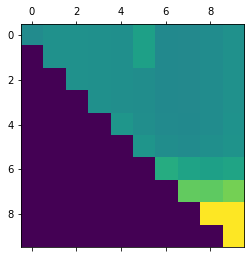

In [16]:
grid_sichao = np.array([[ 805.48317021, 840.97759425, 842.06034379, 834.92549382, 827.38579637, 945.296901, 790.63000498, 785.07152545, 810.46436439, 841.20487003],
 [ 0., 842.45454463, 842.09587443, 835.81418221, 827.52342128, 946.09659303, 790.93963847, 785.32153846, 810.40860355, 840.75019032],
 [ 0., 0., 843.982059, 836.58817463, 827.23137068, 816.84853689, 789.6637456, 785.36504105, 810.24521774, 840.35137768],
 [ 0., 0., 0., 832.77619311, 824.65576735, 818.20031358, 790.73451018, 785.8190806, 810.4837814, 840.24477461],
 [ 0., 0., 0., 0., 875.64808954, 818.98159667, 793.87295167, 786.5766572, 812.02764618, 846.84302626],
 [ 0., 0., 0., 0., 0., 869.10456763, 814.90444308, 803.39758306, 830.41945072, 856.94948578],
 [ 0., 0., 0., 0., 0., 0., 1032.90266462, 965.55000403, 946.46395716, 974.59508318],
 [ 0., 0., 0., 0., 0., 0., 0., 1264.95262606, 1253.01861523, 1316.93731248],
 [ 0., 0., 0., 0., 0., 0., 0., 0., 1663.55275337, 1663.55275334],
 [ 0., 0., 0., 0., 0., 0., 0., 0., 0., 1663.55275334]])
np.set_printoptions(linewidth=150)
print(grid_sichao)
from matplotlib.pyplot import matshow
matshow(grid_sichao)

[[ 863.58593854  906.30216782  906.95391546  936.42504525  922.41378748  957.78981103  910.56960368  802.98930119  837.39280618  890.45416202]
 [   0.          904.98212315  905.93218043 1151.6040887   931.7412915   973.58938645  886.41921452  804.91307966  837.47127122  889.85936459]
 [   0.            0.          907.66438656 1004.38538195  931.74407383  936.35690014  855.73650672  810.5830342   836.83984388  891.275673  ]
 [   0.            0.            0.          941.39840129  904.40723578  926.67516441  856.74890725  808.67415528  838.77434651  895.3136806 ]
 [   0.            0.            0.            0.          921.51304382  892.01116328  911.18148806  837.95811767  852.76994488  891.33231545]
 [   0.            0.            0.            0.            0.          952.24931173  891.85087715  863.86515883  885.28076611  923.90047134]
 [   0.            0.            0.            0.            0.            0.         1136.57343255 1058.65478002 1026.86364863 1056.40636595]

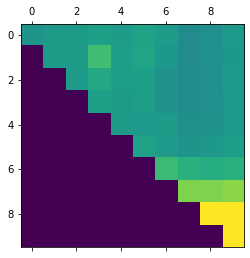

In [6]:
grid_johannes = np.array( [[ 863.58593854, 906.30216782, 906.95391546, 936.42504525, 922.41378748,  957.78981103, 910.56960368, 802.98930119, 837.39280618, 890.45416202],
 [ 0., 904.98212315, 905.93218043, 1151.6040887, 931.7412915,  973.58938645, 886.41921452, 804.91307966, 837.47127122, 889.85936459],
 [ 0., 0., 907.66438656, 1004.38538195, 931.74407383,  936.35690014, 855.73650672, 810.5830342, 836.83984388, 891.275673],
 [ 0., 0., 0., 941.39840129, 904.40723578,  926.67516441, 856.74890725, 808.67415528, 838.77434651, 895.3136806 ],
 [ 0., 0., 0., 0., 921.51304382,  892.01116328, 911.18148806, 837.95811767, 852.76994488, 891.33231545],
 [ 0., 0., 0., 0., 0.,  952.24931173, 891.85087715, 863.86515883, 885.28076611, 923.90047134],
 [ 0., 0., 0., 0., 0.,  0., 1136.57343255, 1058.65478002, 1026.86364863, 1056.40636595],
 [ 0., 0., 0., 0., 0.,  0., 0., 1344.38308821, 1339.49215627, 1376.24400337],
 [ 0., 0., 0., 0., 0.,  0., 0., 0., 1663.55275334, 1663.55275334],
 [ 0., 0., 0., 0., 0.,  0., 0., 0., 0., 1663.55275334]])
np.set_printoptions(linewidth=150)
print(grid_johannes)
from matplotlib.pyplot import matshow
matshow(grid_johannes)

In [24]:
σ_R = [0.75, 1, 1.25]
σ_x = [0., 0.02, 0.05]
cut = len(x_sichao)
n = len(σ_R)
repeats = 3
losses = np.zeros((n, n))
t_s = time()
for i in range(n):
    for j in range(n):
        losses[i, j] = loss(x_sichao[:cut], t_sichao[:cut], σ_x[i], σ_R[j], df_sichao['Sichao_choice'].to_numpy()[:cut], repeats) / repeats
        # print(time() - t_s)
print()
print(losses)

     fun: 392.1458259664346
     jac: array([-3.75366211e-03, -5.68389893e-04,  4.19616699e-05,  2.70843506e-04, -1.41143799e-04])
 message: 'Optimization terminated successfully.'
    nfev: 403
     nit: 52
    njev: 52
  status: 0
 success: True
       x: array([ 0.07766341,  0.48181524, -3.67231394,  1.50959233, -0.63759167])
     fun: 392.53576280301866
     jac: array([-0.00618744, -0.00200653, -0.00029755,  0.00046158,  0.00018311])
 message: 'Optimization terminated successfully.'
    nfev: 259
     nit: 33
    njev: 33
  status: 0
 success: True
       x: array([ 0.08112165,  0.58438063, -3.58121198,  1.03256449, -0.87098323])
     fun: 394.65662278700347
     jac: array([ 3.81355286e-02, -1.40380859e-03,  9.15527344e-05,  1.60217285e-04, -2.70843506e-04])
 message: 'Optimization terminated successfully.'
    nfev: 244
     nit: 31
    njev: 31
  status: 0
 success: True
       x: array([ 0.0830752 ,  0.67669219, -3.51465818,  0.69805645, -1.039569  ])
     fun: 392.54342311328

In [10]:
def loss2(x, t, σ_x, σ_R, df_target, repeats=1):
    print(σ_R)
    x = add_noise(np.repeat(x, repeats, axis=0), σ_x)
    t = np.repeat(t, repeats, axis=0)
    df_target = np.repeat(df_target, repeats, axis=0)
    ℓ = []
    for ii in range(x.shape[0]):
        ℓ.append(np.array(apply_filters_on_trial(x[ii], t[ii], σ_R, structures=structures)))
    df = pd.DataFrame(ℓ, columns=s)
    df['target'] = df_target
    mask = np.column_stack([df['target'] == structure for structure in ['IND', 'GLO'] + ['CLU'] * 3 + ['SDH'] * 3])
    res = fit(df, mask, 'target', np.array([0.1, 0., 0., 0.]), disp=False)
    print(res)
    print()
    return res.fun

In [5]:
σ_R = [1, 1.5, 2]
σ_x = [0., 0.02, 0.05]
cut = len(x_sichao)
n = len(σ_R)
repeats = 1
losses = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        losses[i, j] = loss2(x_sichao[:cut], t_sichao[:cut], σ_x[i], σ_R[j], df_sichao['Sichao_choice'].to_numpy()[:cut], repeats) / repeats
print()
print(losses)

     fun: 139.81840781864418
     jac: array([-0.00471497,  0.00073624, -0.00051117, -0.00045013])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.27414579, 3.08196445, 7.96897451, 5.47801145])
     fun: 144.9041249452179
     jac: array([-0.00806046,  0.00136948, -0.00134087, -0.00060654])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.34548919, 1.25291805, 5.43680307, 3.35992353])
     fun: 149.74160601672656
     jac: array([ 0.0031147 ,  0.00086594, -0.00016022, -0.00077629])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.40168358, 0.46916176, 4.25102089, 2.403866  ])
     fun: 140.14186127653062
     jac: array([-0.00469208,  0.00073242, -0.00053787, -0.00045395])
 message: 'Optimization terminated successfully.'
    nfev

In [5]:
σ_R = np.arange(0.5, 3, 0.1)
n = len(σ_R)
repeats = 1
losses = np.zeros(n)
for i in range(n):
    losses[i] = loss2(x_sichao, t_sichao, 0, σ_R[i], df_sichao['Sichao_choice'].to_numpy(), repeats) / repeats
print()
print(losses)

     fun: 134.48030077876354
     jac: array([ 0.00281906, -0.00074387,  0.00117874, -0.00017166])
 message: 'Optimization terminated successfully.'
    nfev: 128
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 0.2881044 , -1.04817294,  4.95022523,  2.22571568])
     fun: 133.9476060168402
     jac: array([ 0.0037384 , -0.00014496,  0.00048447, -0.00021935])
 message: 'Optimization terminated successfully.'
    nfev: 121
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([ 0.32696105, -1.58398462,  4.05120241,  1.55800012])
     fun: 133.7437797471176
     jac: array([-0.00519562, -0.00089645, -0.00026894,  0.00114632])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 0.3599305 , -1.80235346,  3.5373054 ,  1.20639874])
     fun: 133.77066107382598
     jac: array([ 0.01169395, -0.00085831,  0.00071907,  0.00087357])
 message: 'Optimization terminated successful

KeyboardInterrupt: 

In [11]:
σ_R = np.arange(0.5, 1.5, 0.1)
n = len(σ_R)
repeats = 1
losses = np.zeros(n)
for i in range(n):
    losses[i] = loss2(x_johannes, t_johannes, 0, σ_R[i], df_johannes['Johannes_choice'].to_numpy(), repeats) / repeats
print()
print(losses)

0.5
     fun: 152.60165523173606
     jac: array([-0.00052261, -0.00062561,  0.00090218, -0.0001564 ])
 message: 'Optimization terminated successfully.'
    nfev: 115
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 0.28499267, -1.50647895,  3.71554061,  1.62851384])

0.6
     fun: 152.76472578870226
     jac: array([ 0.02947998, -0.00038147,  0.00024414,  0.00070572])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 0.32883853, -2.40127849,  2.63329852,  0.66971733])

0.7
     fun: 153.0273802122395
     jac: array([-2.86102295e-04, -6.10351562e-05, -7.24792480e-05,  1.22070312e-04])
 message: 'Optimization terminated successfully.'
    nfev: 109
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 0.37354968, -3.0504036 ,  1.80921991, -0.0486895 ])

0.7999999999999999
     fun: 153.30587873704357
     jac: array([-0.00038338, -0.00031471, -0.00047493,  0.00068

In [12]:
σ_R = np.arange(0.4, 0.6, 0.05)
n = len(σ_R)
repeats = 1
losses = np.zeros(n)
for i in range(n):
    losses[i] = loss2(x_johannes, t_johannes, 0, σ_R[i], df_johannes['Johannes_choice'].to_numpy(), repeats) / repeats
print()
print(losses)

0.4
     fun: 152.6790455090258
     jac: array([ 6.18171692e-03, -2.72750854e-04, -1.14440918e-05,  1.52587891e-04])
 message: 'Optimization terminated successfully.'
    nfev: 131
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 0.24013723, -0.13652269,  5.30998298,  3.06221493])

0.45
     fun: 152.5990219161752
     jac: array([-0.00074196, -0.00112534,  0.00051498,  0.00060272])
 message: 'Optimization terminated successfully.'
    nfev: 117
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 0.26276421, -0.90056984,  4.42544077,  2.26509202])

0.5
     fun: 152.60165523173606
     jac: array([-0.00052261, -0.00062561,  0.00090218, -0.0001564 ])
 message: 'Optimization terminated successfully.'
    nfev: 115
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 0.28499267, -1.50647895,  3.71554061,  1.62851384])

0.55
     fun: 152.66344354309558
     jac: array([-0.00247955, -0.00040436,  0.00029755,  0.        ])
 message